## **Imports** 

In [29]:
import numpy as np 
import Markovitz_reductionV1
import Markovitz_reductionV2
import results_annalysis

## **Markovitz energie** 

We will test with 3 assets to verify the reduction 

Defining the expected return vector and the covaraiance matrix (only an example )

In [30]:


# Expected returns
mu_A = 0.08
mu_B = 0.12
mu_C = 0.10
# Covariances
sigma_AA = 0.0004;sigma_AB = 0.0003;sigma_AC = 0.0002;sigma_BA = 0.0003;sigma_BB = 0.0005
sigma_BC = 0.0004;sigma_CA = 0.0002;sigma_CB = 0.0004;sigma_CC = 0.0006
# Expected return vector
expected_return_vector = np.array([mu_A, mu_B, mu_C])
Mu = expected_return_vector

# Covariance matrix
covariance_matrix = np.array([[sigma_AA, sigma_AB, sigma_AC],
                              [sigma_BA, sigma_BB, sigma_BC],
                              [sigma_CA, sigma_CB, sigma_CC]])
V = covariance_matrix



Defining the optimizing parameters

In [31]:
Lamda1 = 1
Lamda2 = 1
Lamda  = [0.5,0.5,0.5]
fraction = 50
step = 0.05
iteration = 1000
n_cond_init = 50

def temperature(self, t):
    tau = iteration/1
    # temp = 10*(1-np.exp(-1/tau*(t-1)))
    temp = 0.1*np.log(100*t)
    return 0.05
    # r = np.random.randint(0, 2)*2-1
    # return temp

def a(self, t):
    a0=0
    return t/iteration/100
    # if t<100:
    #     return 0.01*t
    # else:
    #     return 1

def step_func(self, t):
    # return 1.01-np.exp(-0.01*(t-1))
    # return 1/t
    return step

**The Markovitz problem**

In [32]:
markovitz = Markovitz_reductionV2.Markovitz(fraction,V, Mu, Lamda1, Lamda2,Lamda, step_func, iteration, n_cond_init,temperature,a)

**Energies**

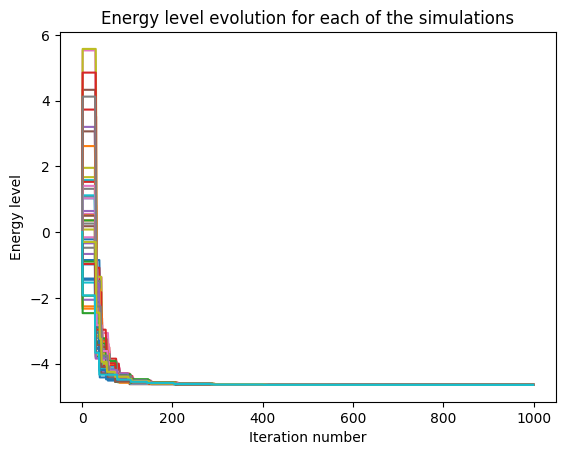

-4.649711274158292

In [33]:
states,energies = markovitz.SB_optimization(step_func, iteration, n_cond_init,temperature,a)
results_annalysis.plot_energies_evolution(energies)
results_annalysis.extract_full_solution(states, energies)[0]

In [34]:
print(np.shape(states))

(50, 150, 1000, 2)


In [35]:
def Pbinaire(bits,n): 
    p = np.zeros((n,n*(bits)))
    pp = np.array([2**i for i in range(bits)])
    # pp= np.ones(bits)

    for i in range(n):
        start = i*(bits)
        p[i,start:start+len(pp)] = pp
    return p/(2**bits)

In [36]:
# import matplotlib.pyplot as plt 
# Energies = markovitz.energies(states)
# for i in range(n_cond_init): 
#     plt.plot(np.array(list(range(iteration))), Energies[i,:])

# plt.xlabel('Time Step')
# plt.ylabel('energies')
# plt.show()

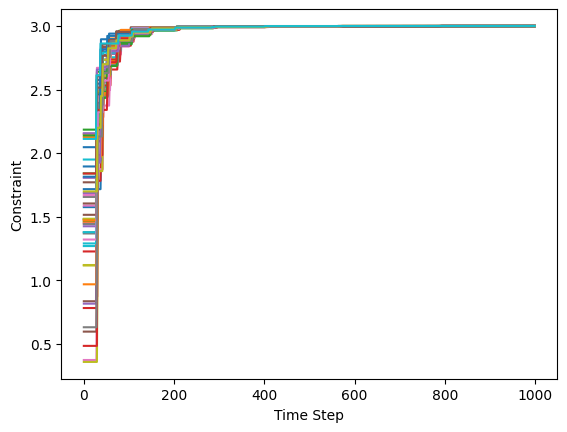

In [37]:
# Evolution of the constraint that P (SF+I)/2 = 1 
import matplotlib.pyplot as plt 
Sum = np.zeros((n_cond_init,iteration))
for t in range(iteration): 
    S = states[:,:,t,0]
    SF= np.zeros(np.shape(S))
    SF[states[:, :, t, 0] >= 0] = 1
    SF[states[:, :, t, 0] < 0] = -1
    I = np.ones(np.shape(SF))
    Weights = np.dot(Pbinaire(fraction,3),(SF+I).T)/2
    Sum[:,t] = np.sum(Weights,axis = 0 )

# print(np.sum(Weights,axis = 0))
# print(Sum)
for i in range(n_cond_init): 
    plt.plot(np.array(list(range(iteration))), Sum[i,:])

plt.xlabel('Time Step')
plt.ylabel('Constraint')
plt.show()
        

In [38]:

print(states[Sum[:,-1]==1,:,-1,0])

[]


In [39]:
print(states[0,:,-1,0])#[condition intial, particule,temps,[position,speed]]

[ 1.          1.         -1.         -1.          1.         -1.
 -1.          1.         -1.          1.          1.          1.
  1.         -0.99999998  1.          1.          1.         -0.9999996
 -0.9999992   1.         -0.99999682 -0.99999363  1.          1.
 -0.99994908  1.         -0.99979631 -0.99959262 -0.99918524 -0.99837049
 -0.99674097 -0.99348194 -0.98696388 -0.97392776  1.         -0.89571104
  1.          1.          1.          0.66862335  1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.         -1.         -1.         -1.         -1.
 -1.          1.         -1.          1.          1.          1.
  1.         -0.99999999  1.         -0.99999998  1.         -0.9999999
  1.         -0.9999996   1.         -0.9999984   1.          1.
  1.          1.          1.         -0.99989785  1.          1.
  1.          1.          1.         -0.99346224  1.         -0.97384896
 -0.94769793  1.         -0.79079171  1.         -0.

In [40]:
S = states[21,:,-1,0]

SF= np.zeros(len(S))
for i in range(len(S)): 
    if S[i]>=0: 
        SF[i] = 1
    else: 
        SF[i] = -1

print(SF)
def P(fraction,n): 
    p = np.zeros((n,n*(fraction-1)))
    pp = np.array([i+1 for i in range(fraction -1 )])
    for i in range(n):
        start = i*(fraction-1)
        p[i,start:start+len(pp)] = pp
    return p/fraction

def Pbinaire(bits,n): 
    p = np.zeros((n,n*(bits)))
    pp = np.array([2**i for i in range(bits)])
    # pp= np.ones(bits)

    for i in range(n):
        start = i*(bits)
        p[i,start:start+len(pp)] = pp
    return p/(2**bits)

I = np.ones(len(S))
Choices = (SF+I)/2
Weights = np.dot(Pbinaire(fraction,3),Choices)
print(Weights)

[-1.  1.  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.
 -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
 -1. -1. -1. -1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.
  1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.
  1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1.
 -1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]
[0.9997684  0.99993311 0.99979905]


 **Seeing the weights**

In [41]:

# H,J = markovitz.Reduction_to_Ising()
Weights = markovitz.Ising_to_Portfolio(step_func, iteration, n_cond_init,temperature,a)

In [42]:
print(Weights)

[0.99985958 0.99983601 0.99975548]


## **SB with gradient**

In here we use the version 1 of the Markovitz reduction where we give the forces 

In [43]:
markovitz = Markovitz_reductionV1.Markovitz(fraction,V, Mu, Lamda1, Lamda2,Lamda, step_func, iteration, n_cond_init,temperature,a)


In [44]:
states = markovitz.SB_optimization(step_func, iteration, n_cond_init,temperature,a)


It's the matrix P defined in the report where W = PC where S = 2C-1

In [45]:
def Pbinaire(bits,n): 
    p = np.zeros((n,n*(bits)))
    pp = np.array([2**i for i in range(bits)])
    # pp= np.ones(bits)

    for i in range(n):
        start = i*(bits)
        p[i,start:start+len(pp)] = pp
    return p/(2**bits)

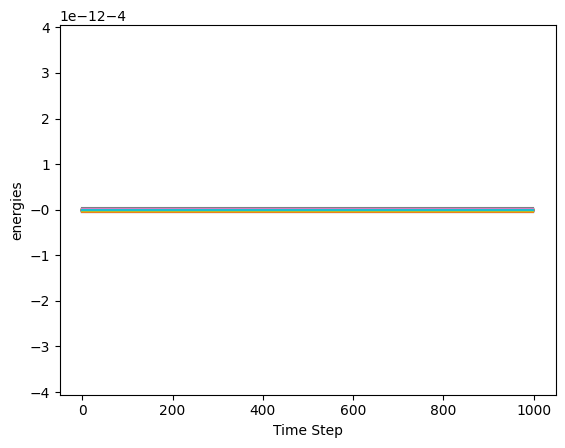

In [46]:
import matplotlib.pyplot as plt 
Energies = markovitz.energies(states)
for i in range(n_cond_init): 
    plt.plot(np.array(list(range(iteration))), Energies[i,:])

plt.xlabel('Time Step')
plt.ylabel('energies')
plt.show()

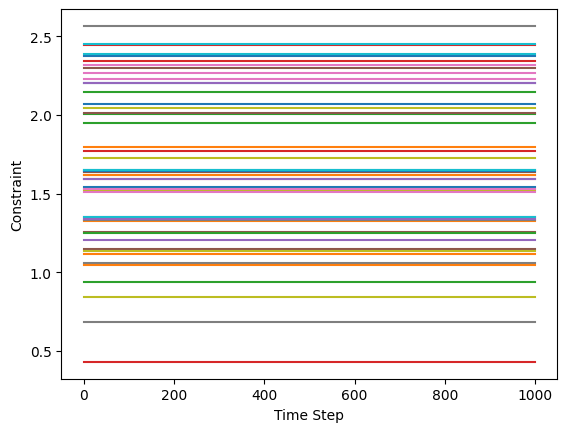

In [47]:
# Evolution of the constraint that P (SF+I)/2 = 1 
import matplotlib.pyplot as plt 
Sum = np.zeros((n_cond_init,iteration))
for t in range(iteration): 
    S = states[:,:,t,0]
    SF= np.zeros(np.shape(S))
    SF[states[:, :, t, 0] >= 0] = 1
    SF[states[:, :, t, 0] < 0] = -1
    I = np.ones(np.shape(SF))
    Weights = np.dot(Pbinaire(fraction,3),(SF+I).T)/2
    Sum[:,t] = np.sum(Weights,axis = 0 )

# print(np.sum(Weights,axis = 0))
# print(Sum)
for i in range(n_cond_init): 
    plt.plot(np.array(list(range(iteration))), Sum[i,:])

plt.xlabel('Time Step')
plt.ylabel('Constraint')
plt.show()
        

**Looking for how many initial conditions respect the constraints**

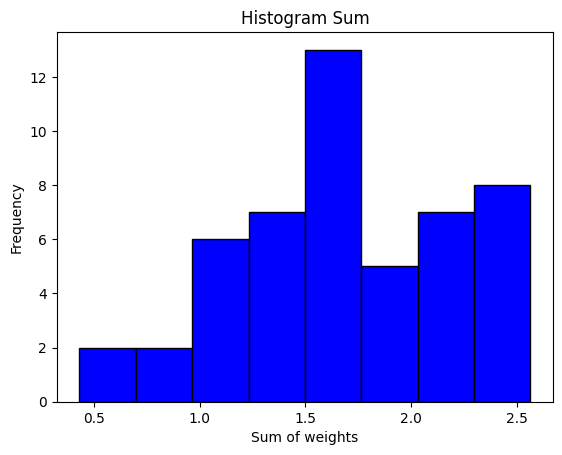

In [48]:
import matplotlib.pyplot as plt 
Final_sum = Sum[:,-1]
plt.hist(Final_sum, bins=8, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Sum of weights')
plt.ylabel('Frequency')
plt.title('Histogram Sum')

# Show the plot
plt.show()


In [49]:
Sum = Sum - np.ones(np.shape(Sum))
print()
Sum_pos = Sum[Sum[:,-1] >= 0, -1]
Sum_neg = Sum[Sum[:,-1] <= 0, -1]
print(Sum[Sum[:, -1] == min(Sum_pos),-1])



[0.04693161]


In [50]:
def indice(Sum,va): 
    for i in range(Sum.shape[1]): 
        if Sum[i,-1] == va: 
            return i 
    return None 

condition_initiale = indice(Sum,min(Sum_pos))
print(condition_initiale)
    

41


In [51]:
print(states[abs(Sum[:,-1])==min(abs(Sum[:,-1]-1)),:,-1,0])

[]


In [52]:
S= states[24,:,-1,0]
print(S)

# S = states[40,:,-1,0]

SF= np.zeros(len(S))
for i in range(len(S)): 
    if S[i]>=0: 
        SF[i] = 1
    else: 
        SF[i] = -1

print(SF)



def Pbinaire(bits,n): 
    p = np.zeros((n,n*(bits)))
    pp = np.array([2**i for i in range(bits)])
    # pp= np.ones(bits)

    for i in range(n):
        start = i*(bits)
        p[i,start:start+len(pp)] = pp
    return p/(2**bits)

I = np.ones(len(S))
Choices = (SF+I)/2
Weights = np.dot(Pbinaire(fraction,3),Choices)
print(Weights)


[-1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.
  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.
  1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.
 -1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1. -1.  1.
 -1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1.
 -1.  1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.
  1.  1. -1.  1. -1. -1.]
[-1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
 -1.  1. -1. -1. -1.  1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.
 -1.  1. -1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1.
  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.
  1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.
 -1. -1. -1.  1.  1.  1. 

## **Compare the gradient and the gradient with H and J**

In [53]:
Positions = states[:,:,0,0]

In [54]:
markovitz_gradient = Markovitz_reductionV1.Markovitz(fraction,V, Mu, Lamda1, Lamda2,Lamda, step_func, iteration, n_cond_init,temperature,a)
markovitz_HJ= Markovitz_reductionV2.Markovitz(fraction,V, Mu, Lamda1, Lamda2,Lamda, step_func, iteration, n_cond_init,temperature,a)



In [55]:
H,J = markovitz_HJ.Reduction_to_Ising()
# G =np.zeros(np.shape(Positions))
# for i in range(Positions.shape[0]) :
#     G[i,:] = H

forces_JH= (J @ states[:,:,0,0].T).T - H 
print(np.max(forces_JH))


Forces_gradient = markovitz_gradient.forces(states[:,:,0,0])
print(np.max(Forces_gradient))

# print((forces_JH - Forces_gradient))


1.2785062014694801
1.7412293829011216e-15
